In [1]:
from oggm import cfg, workflow, utils, shop
import pandas as pd
import os, glob
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

## L2 Files 

In [2]:
border = 80

dd = '../'

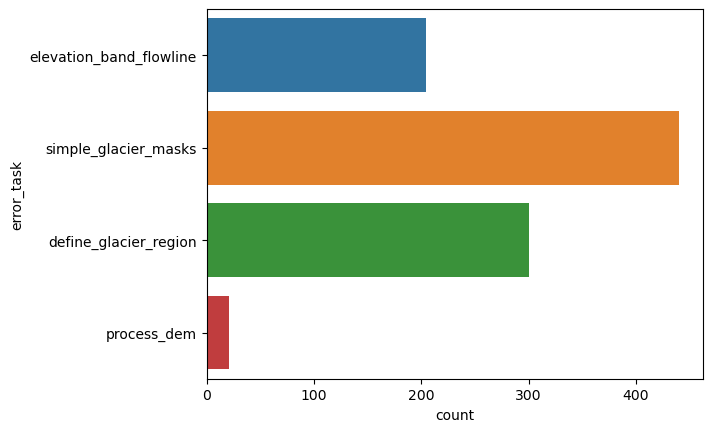

0.05082716212657898


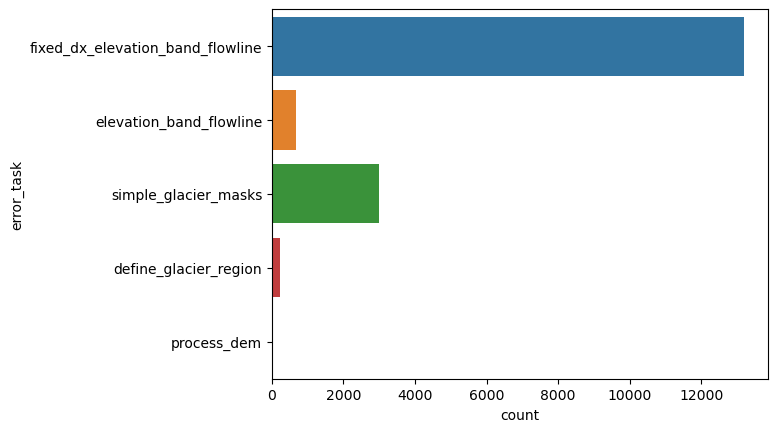

0.1261206813102495


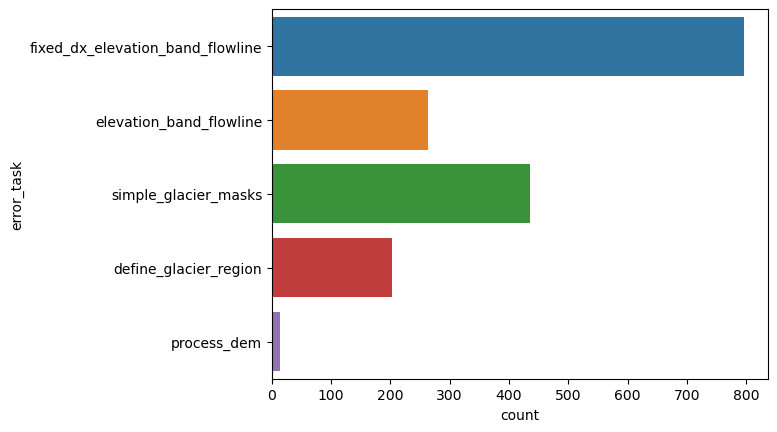

0.04148941781976744


In [10]:
dfserr = []

for exp in ['elev_bands_utm', 'elev_bands_utm_dx100', 'elev_bands_utm_dx50']:  # , 'elev_bands_utm_dx50'

    fd = f'{dd}/{exp}/RGI62/b_{border:03d}/L2/summary/'
    fs = glob.glob(fd+'glacier_statistics*.csv')
    assert len(fs) >= 18
    
    df = []
    for f in fs:
        df.append(pd.read_csv(f, index_col=0, low_memory=False))
    df = pd.concat(df).sort_index()
    
    plt.figure()
    sns.countplot(y="error_task", data=df);
    plt.show()
    
    print(df.loc[~df['error_task'].isnull()].rgi_area_km2.sum() / df.rgi_area_km2.sum() * 100)
    
    dfserr.append(df.loc[~df['error_task'].isnull()].sort_values(by='rgi_area_km2', ascending=False)[['rgi_area_km2', 'error_task', 'error_msg']].iloc[:15])

In [8]:
sorted(fs)

['..//elev_bands_utm_dx100/RGI62/b_080/L2/summary/glacier_statistics_01.csv',
 '..//elev_bands_utm_dx100/RGI62/b_080/L2/summary/glacier_statistics_02.csv',
 '..//elev_bands_utm_dx100/RGI62/b_080/L2/summary/glacier_statistics_03.csv',
 '..//elev_bands_utm_dx100/RGI62/b_080/L2/summary/glacier_statistics_04.csv',
 '..//elev_bands_utm_dx100/RGI62/b_080/L2/summary/glacier_statistics_05.csv',
 '..//elev_bands_utm_dx100/RGI62/b_080/L2/summary/glacier_statistics_06.csv',
 '..//elev_bands_utm_dx100/RGI62/b_080/L2/summary/glacier_statistics_07.csv',
 '..//elev_bands_utm_dx100/RGI62/b_080/L2/summary/glacier_statistics_08.csv',
 '..//elev_bands_utm_dx100/RGI62/b_080/L2/summary/glacier_statistics_09.csv',
 '..//elev_bands_utm_dx100/RGI62/b_080/L2/summary/glacier_statistics_11.csv',
 '..//elev_bands_utm_dx100/RGI62/b_080/L2/summary/glacier_statistics_12.csv',
 '..//elev_bands_utm_dx100/RGI62/b_080/L2/summary/glacier_statistics_13.csv',
 '..//elev_bands_utm_dx100/RGI62/b_080/L2/summary/glacier_statis

In [ ]:
dfserr[0].iloc[0:10]

In [ ]:
dfserr[1].iloc[0:10]

In [ ]:
dfserr[1].iloc[0].error_msg

In [ ]:
dfserr[2].iloc[0:10]

In [ ]:
dfserr = []

for exp in ['elev_bands', 'centerlines']:  # 

    fd = f'{dd}/{exp}/RGI62/b_{border:03d}/L2/summary/'
    fs = glob.glob(fd+'glacier_sthttps://cluster.klima.uni-bremen.de/data/gdirs/dems_v2/defaultatistics*.csv')
    assert len(fs) == 19
    
    df = []
    for f in fs:
        df.append(pd.read_csv(f, index_col=0, low_memory=False))
    df = pd.concat(df).sort_index()
    
    plt.figure()
    sns.countplot(y="error_task", data=df);
    plt.show()
    
    print(df.loc[~df['error_task'].isnull()].rgi_area_km2.sum() / df.rgi_area_km2.sum() * 100)
    
    dfserr.append(df.loc[~df['error_task'].isnull()].sort_values(by='rgi_area_km2', ascending=False)[['rgi_area_km2', 'error_task', 'error_msg']].iloc[:15])

In [ ]:
dfserr[0].head()

In [ ]:
dfserr[1].head()

## L5 files - CRU ERA5

In [ ]:
dd = '../L3-L5_files/'

In [ ]:
dfserr = []

border = 160

exp = 'elev_bands'
# exp = 'centerlines'

match = 'no_match'

pcps = ['pcp2.5', 'pcp1.6']
clims = ['CRU', 'ERA5']

for pcp, clim in zip(pcps, clims):  # 

    fd = f'{dd}/{clim}/{exp}/qc3/{pcp}/{match}/RGI62/b_{border:03d}/L5/summary/'
    fs = glob.glob(fd+'glacier_statistics*.csv')
    assert len(fs) >= 18
    
    fs = fs[:18]
    assert len(fs) == 18
    
    df = []
    for f in fs:
        df.append(pd.read_csv(f, index_col=0, low_memory=False))
    df = pd.concat(df).sort_index()
    
    plt.figure()
    sns.countplot(y="error_task", data=df);
    plt.show()
    
    print(df.loc[~df['error_task'].isnull()].rgi_area_km2.sum() / df.rgi_area_km2.sum() * 100)
    
    dfserr.append(df.loc[~df['error_task'].isnull()].sort_values(by='rgi_area_km2', ascending=False)[['rgi_area_km2', 'error_task', 'error_msg']].iloc[:15])

In [ ]:
dfserr[0].head()

## L5 files - ERA5 different setups

In [ ]:
dd = '../L3-L5_files/'

In [ ]:
dfserr = []

border = 160

exp = 'elev_bands'



pcp = 'pcp1.6'
clim = 'ERA5'

for match in ['no_match', 'match_geod', 'match_geod_pergla', 'match_geod_pergla_massredis']:  # 

    fd = f'{dd}/{clim}/{exp}/qc3/{pcp}/{match}/RGI62/b_{border:03d}/L5/summary/'
    fs = glob.glob(fd+'glacier_statistics*.csv')
    assert len(fs) == 19
    
    df = []
    for f in fs:
        df.append(pd.read_csv(f, index_col=0, low_memory=False))
    df = pd.concat(df).sort_index()
    
    plt.figure()
    sns.countplot(y="error_task", data=df);
    plt.show()
    
    print(df.loc[~df['error_task'].isnull()].rgi_area_km2.sum() / df.rgi_area_km2.sum() * 100)
    
    dfserr.append(df.loc[~df['error_task'].isnull()].sort_values(by='rgi_area_km2', ascending=False)[['rgi_area_km2', 'error_task', 'error_msg']].iloc[:15])

In [ ]:
dfserr[-1].head()

In [ ]:
fd

In [ ]:


dfserr = []

for exp in ['elev_bands', 'centerlines']:  # 

    fd = f'CRU/{exp}/qc3/pcp2.5/no_match/RGI62/b_{border:03d}/L5/summary/'
    fs = glob.glob(fd+'glacier_statistics*.csv')
    assert len(fs) == 18
    
    df = []
    for f in fs:
        df.append(pd.read_csv(f, index_col=0, low_memory=False))
    df = pd.concat(df).sort_index()
    
    plt.figure()
    sns.countplot(y="error_task", data=df);
    plt.show()
    
    print(df.loc[~df['error_task'].isnull()].rgi_area_km2.sum() / df.rgi_area_km2.sum() * 100)
    
    dfserr.append(df.loc[~df['error_task'].isnull()].sort_values(by='rgi_area_km2', ascending=False)[['rgi_area_km2', 'error_task', 'error_msg']].iloc[:15])

In [ ]:
dfserr[0]

In [ ]:
dfserr[1]

## Quick check area volume 

In [ ]:
fd = f'ERA5/elev_bands/qc3/pcp1.6/no_match/RGI62/b_080/L5/summary/glacier_statistics_11.csv'
df = pd.read_csv(fd, index_col=0, low_memory=False)

In [ ]:
fd = f'ERA5/elev_bands/qc3/pcp1.6/no_match/RGI62/b_080/L5/summary/historical_run_output_extended_11.nc'
ds = xr.open_dataset(fd)

In [ ]:
ds.volume.sum(dim='rgi_id').plot();

In [ ]:
check = ds.area.isel(time=0).to_dataframe()[['area']]

In [ ]:
check['area_rgi'] = df.rgi_area_km2 * 1e6
check['year_rgi'] = df.rgi_year

In [ ]:
check = check.dropna()

In [ ]:
check.sum()

In [ ]:
check.loc[~ np.isclose(check.area_rgi, check.area)]

In [ ]:
fd = f'CRU/centerlines/qc3/pcp2.5/no_match/RGI62/b_080/L3/summary/'
fs = glob.glob(fd+'glacier_statistics*.csv')
assert len(fs) == 17

In [ ]:
df = []
for f in fs:
    df.append(pd.read_csv(f, index_col=0, low_memory=False))
df = pd.concat(df).sort_index()

In [ ]:
dfv = df[['inv_volume_km3']].dropna()

In [ ]:
df_ref = pd.read_hdf(utils.get_demo_file('rgi62_itmix_df.h5'))

In [ ]:
dfv['ref'] = df_ref.loc[dfv.index]['vol_itmix_m3'] * 1e-9

In [ ]:
dfv.sum()

In [ ]:
len(dfv)